In [1]:
import cv2 as cv  # 4.5.5
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import matplotlib
import old_utils as utils
from PIL import ImageGrab

assets_loaded = utils.load_test_assets()

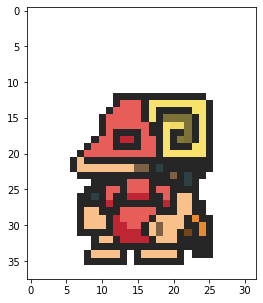

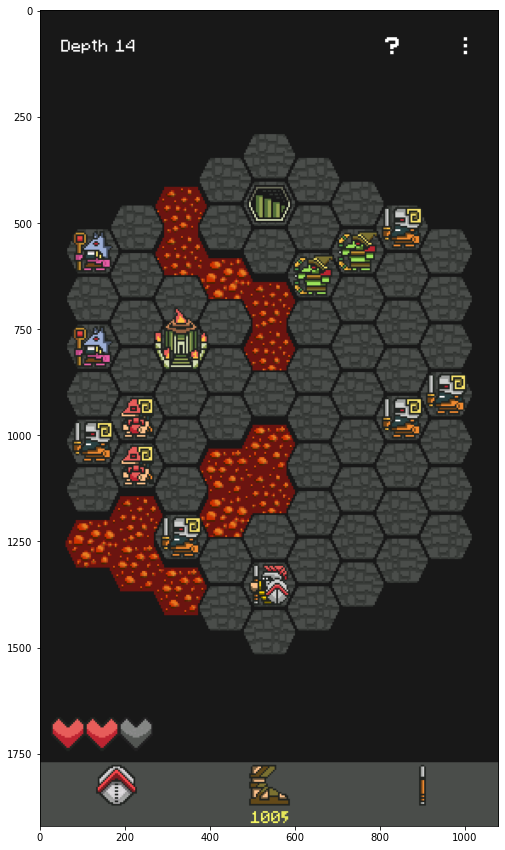

In [2]:
matplotlib.rcParams['figure.figsize'] = (5, 5)
img = utils.bgra2rgba(cv.imread(assets_loaded['monsters'][4], cv.IMREAD_UNCHANGED))  # knight
img = utils.bgra2rgba(cv.imread(assets_loaded['monsters'][0], cv.IMREAD_UNCHANGED))  # demolisher wo. bomb
utils.plt_img(img)

matplotlib.rcParams['figure.figsize'] = (20, 15)
base_image = 'simple2.png'
base_image = 'many.png'
base = cv.imread('screens/1080x1920/'+str(base_image))
utils.plt_img(utils.bgra2rgba(base))


In [3]:
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255),
          (0, 255, 255), (255, 255, 255)]
i = 0

# Define flann matcher
MIN_MATCH_COUNT = 10
FLANN_INDEX_KDTREE = 1  # align exposures
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=100)
flann = cv.FlannBasedMatcher(index_params, search_params)


img_scaled = utils.resize_image(img, 4)
gray = cv.cvtColor(img_scaled, cv.COLOR_BGR2GRAY)  # to gray


sift = cv.SIFT_create()  # features extractor
kp, des = sift.detectAndCompute(gray, None)
# orb = cv.ORB_create(10000, 1.2, nlevels=8, edgeThreshold = 5)
# kp, des = orb.detectAndCompute(gray, None)

while(True):
    img_np = np.array(ImageGrab.grab(bbox=(200, 100, 1920, 1080))) # Read screen
    # img_np = base # Read file
    frame = cv.cvtColor(img_np, cv.COLOR_BGR2GRAY)
    img_np = cv.cvtColor(img_np, cv.COLOR_BGR2RGB)
    kp_base, des_base = sift.detectAndCompute(frame, None)
    # kp_base, des_base = orb.detectAndCompute(frame, None)

    matches = flann.knnMatch(des, des_base, k=2)

    good = []
    for m, n in matches:
        if m.distance < 0.8*n.distance:  # you may adjust value here
            good.append(m)

    if True or len(good) > MIN_MATCH_COUNT:
        src_pts = np.float32(
            [kp[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dst_pts = np.float32(
            [kp_base[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

        for point in dst_pts:
            cv.circle(img_np, (int(point[0][0]), int(
                point[0][1])), 3, colors[i % len(colors)], 5)

    cv.imshow("test", img_np)
    k = cv.waitKey(1)
    if k == 27:
        break
cv.destroyAllWindows()